## Part 1: Clustering *(15 marks)*

Let's assume you want to design an environment to predict a class/category from a dataset based on specific features of that class. However, all the features are not strong enough or in other words features not that much variance/uniqueness across the classes. So, you have to design a clustering model by answering the following questions:

1. Download the attached clustering.csv file. Read the file and separate the class and feature matrix. __(2 marks)__

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
# Import packages
# !pip install pyclustering

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import pyclustering
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

In [37]:
## Import csv to data frame ##
a2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Personal Projects/Clustering/clustering.csv') 

## Separate the class and feature matrix ##
a2_feature = a2.iloc[:,0:7]
a2_class = a2.iloc[:,7]

2. Determine the number of clusters from the dataset. Is this same as the actual number of classes in the dataset? __(1 marks)__

<!-- Choose the best three features using different selection criteria (ANOVA, Chi-squared) based on the purity score for the k-mean cluster (Euclidean distance matrix). Which one is good and why? __(5 marks)__ -->

In [38]:
# Preprocessing process - Normalization
from sklearn.preprocessing import StandardScaler
a2_norm = StandardScaler().fit_transform(a2_feature)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

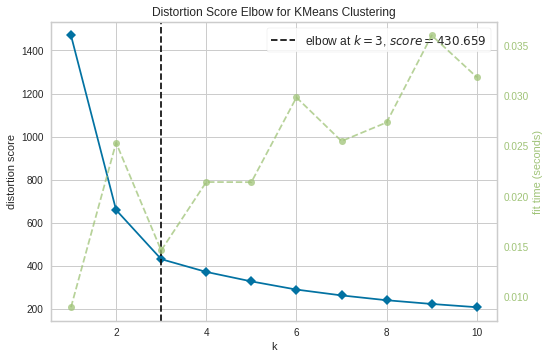

In [39]:
## Determine the number of clusters ##

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(a2_norm) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

Perform K-means using sklearn

In [41]:
# instatiate KMeans class and set the number of clusters
km_model = KMeans(n_clusters=3, random_state=10)

# call fit method with data 
km = km_model.fit_predict(a2_norm)

# coordinates of cluster center
centroids = km_model.cluster_centers_ 

# cluster label for each data point
labels = km_model.labels_ 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


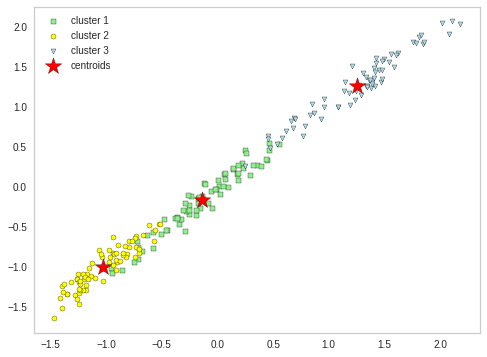

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(
    a2_norm[km == 0, 0], a2_norm[km == 0, 1],
    s=25, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    a2_norm[km == 1, 0], a2_norm[km == 1, 1],
    s=25, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    a2_norm[km == 2, 0], a2_norm[km == 2, 1],
    s=25, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# visualise centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

3. Perform K-Means clustering on the complete dataset and report purity score. __(2 marks)__ 

In [46]:
############################
# Develop purity function #
from sklearn import metrics
def purity_score(y_true, y_predicted):
    # create contingency table
    cont_matrix = metrics.cluster.contingency_matrix(y_true, y_predicted)
    print (cont_matrix)
    # calculate purity
    return np.sum(np.amax(cont_matrix, axis=0)) / np.sum(cont_matrix)

#Report purity score
purity = purity_score(a2_class, labels)
print(f"The purity score is {round(purity*100, 2)}%")

[[62  6  2]
 [ 5  0 65]
 [ 4 66  0]]
The purity score is 91.9%


4. There are several distance metrics for  K-Means such as euclidean, squared euclidean, Manhattan, Chebyshev, Minkowski. [ __Hints:__ See the pyclustering library for python.]
    - Your job is to compare the purity score of k-means clustering for different distance metrics. __(5 marks)__ 
    - Select the best distance metric and explain why this distance metric is best for the given dataset. __(2 marks)__ 

In [47]:
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

In [67]:
#define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}

# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(a2_norm, 3, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(a2_norm, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, a2_norm)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    return purity_score(a2_class, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")

[[ 3  3 64]
 [ 0 67  3]
 [62  0  8]]
The purity score for euclidean distance is 91.9%
[[ 3  4 63]
 [ 0 67  3]
 [62  0  8]]
The purity score for squared euclidean distance is 91.43%
[[11  2 57]
 [ 0 62  8]
 [68  0  2]]
The purity score for manhattan distance is 89.05%
[[ 4 59  7]
 [68  2  0]
 [ 0  9 61]]
The purity score for chebyshev distance is 89.52%
[[20 11 39]
 [ 0 70  0]
 [70  0  0]]
The purity score for canberra distance is 85.24%
[[11  5 54]
 [ 0 68  2]
 [67  0  3]]
The purity score for chi-square distance is 90.0%
